# Regression Assignment

For this assignment you will find your own dataset, make a regression model, and create one visualization. There are many great sources for data  you can use. There is the example_datasets, the sklearn datasets, or just any CSV on the internet! Just be sure that there are continuous variables so you can use regression to predict. Once your model is done make some sort of visualization, like a plot of the data and regression line.

In [6]:
from IPython.display import Image
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
import warnings
warnings.simplefilter("ignore")
%matplotlib inline

matplotlib.rcParams['figure.figsize'] = [14, 14]

In [4]:
data = pd.read_pickle("../../../Day 9/exploratory_data_analysis_part2/data/airbnb.pkl") 

In [5]:
data.head()

,room_id,host_id,room_type,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price
0,6499,14455,Entire home/apt,Belém,8,5.0,2,1.0,57.0
1,17031,66015,Entire home/apt,Alvalade,0,0.0,2,1.0,46.0
2,25659,107347,Entire home/apt,Santa Maria Maior,63,5.0,3,1.0,69.0
3,29248,125768,Entire home/apt,Santa Maria Maior,225,4.5,4,1.0,58.0
4,29396,126415,Entire home/apt,Santa Maria Maior,132,5.0,4,1.0,67.0


In [7]:
from sklearn.linear_model import LinearRegression

In [11]:
numerical_data = data[["reviews", "overall_satisfaction", "accommodates", "bedrooms", "price"]].fillna(0)

In [12]:
independent_variables = numerical_data[["reviews", "overall_satisfaction", "accommodates", "bedrooms"]]
target_variable = numerical_data["price"]

In [13]:
model = LinearRegression()
model.fit(X=independent_variables, y=target_variable)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [14]:
predictions = model.predict(independent_variables)

In [15]:
for y, y_pred in list(zip(target_variable, predictions))[:5]:
    print("Real value: {:.3f} Estimated value: {:.5f}".format(y, y_pred))

Real value: 57.000 Estimated value: 41.00043
Real value: 46.000 Estimated value: 84.61844
Real value: 69.000 Estimated value: 48.55996
Real value: 58.000 Estimated value: 53.52611
Real value: 67.000 Estimated value: 55.21622


In [16]:
numerical_data["revenue_predict"] = predictions

In [17]:
numerical_data.head()

,reviews,overall_satisfaction,accommodates,bedrooms,price,revenue_predict
0,8,5.0,2,1.0,57.0,41.000425
1,0,0.0,2,1.0,46.0,84.618438
2,63,5.0,3,1.0,69.0,48.559958
3,225,4.5,4,1.0,58.0,53.526107
4,132,5.0,4,1.0,67.0,55.216220


In [26]:
numerical_data = numerical_data[~numerical_data.isnull().any(axis=1)]

In [27]:
independent_variables_ass = ["reviews", "overall_satisfaction", "accommodates", "bedrooms"]
dependent_variable = "price"
X = numerical_data[independent_variables_ass].values
y = numerical_data[dependent_variable].values
X_T = X.T

In [28]:
betas = np.linalg.inv(X_T @ X) @ X_T @ y
betas

array([-0.04994559, -3.93086402, 14.93968051, 22.78833862])

In [29]:
y.mean()

86.59235187424426

In [30]:
alpha = y.mean() - np.dot(betas,numerical_data[independent_variables_ass].mean().values)
alpha

7.108264547101598

In [31]:
model_formula = "y ~ {:.2f} + ".format(alpha) + " + ".join(
                    map(lambda x: "{:.2f}*{}".format(x[0], x[1]),
                        zip(betas, independent_variables_ass)))

model_formula

'y ~ 7.11 + -0.05*reviews + -3.93*overall_satisfaction + 14.94*accommodates + 22.79*bedrooms'

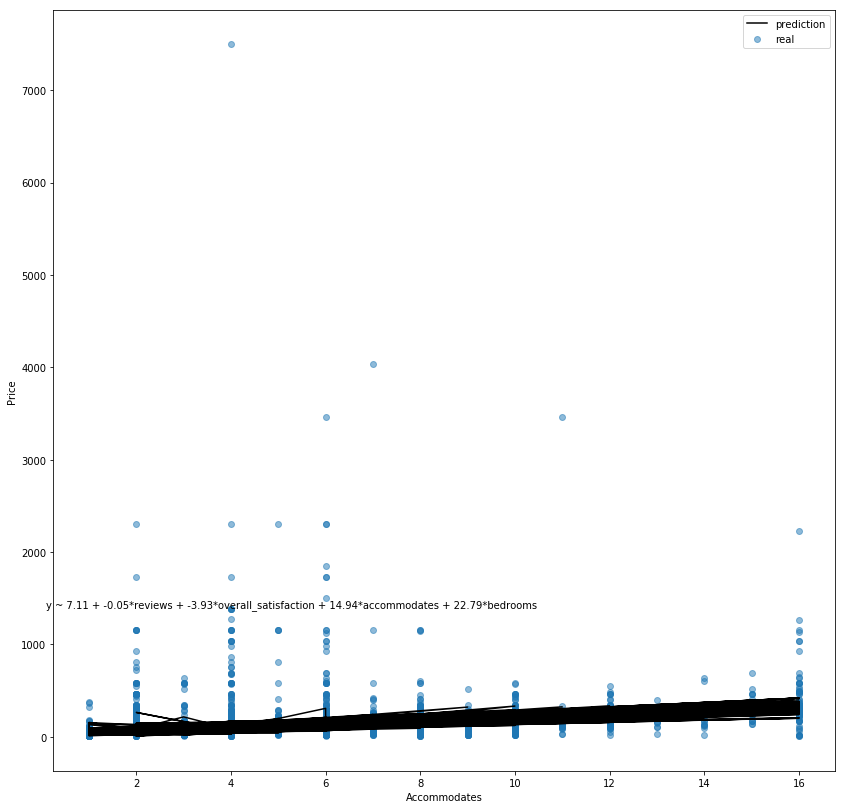

In [33]:
plt.scatter(numerical_data.accommodates, numerical_data.price, alpha=0.5, label="real")
plt.text(0.1, 1400, model_formula)
plt.plot(numerical_data.accommodates,numerical_data.revenue_predict, c="black", label="prediction")
plt.xlabel("Accommodates")
plt.ylabel("Price")
plt.legend();